### Problem Statement -- ML Queries 
About the files - 
interview_txn_data.csv file has transaction data
Amount - transaction value
PayeeRefID - end customer ID
CreatedDate - Transaction timestamp
TransactionStatusRefID - 2 is for sucess and anything else is failed transaction
AgentRefID - The retailer ID (Our Customer)
DistributorRefID - The guy above Agent in heirarchy

interview_ticket_data.csv file is the customer care data
TicketCreatedDateTime - Ticket created time
AgentRefID - The retailer ID (Our Customer)


About the business - 
So the Agent has our app and the end customer(PayeeRefID) comes to the Agent and avails services.
Distributor provides credit to the Agent

Section 1 (ML Questions):
Problem Statement - 
Perform EDA and explain Business Summary & Observations. You're free to use SQL/R/Python/Excel/Vizualisation Tools.

Find Churn Rate
Find X day from which which we can say X days of inactivity means Churn

Develop Churn Prediction Model
Explain why you chose this model with performance metrics


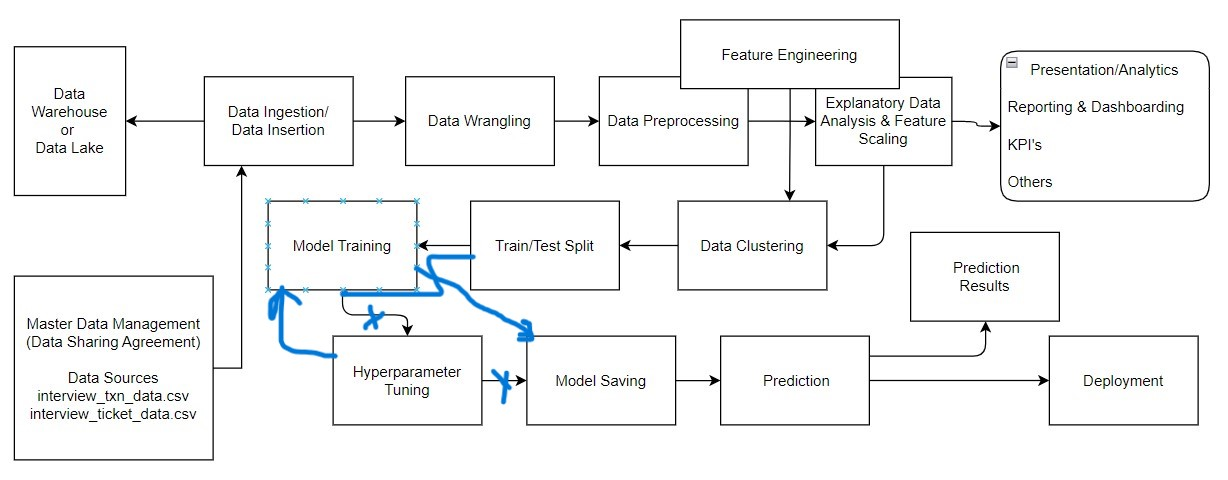

**Apologies, I have committed a mistake** 
  
  - Correct Flow is highlighted by the Blue penmarker i.e Train-Test Split --> Hyperparameter Tuning --> Model Training --
      --> Model Saving Then Prediction will be using Performance Metrics like ROC Curve, F2 Score.
      
  - Reason for Selection of the Performance Metrics will stated afterwards.


### *Thought Process* :-- 

- **Load the Dataset** :-- .2 files are given i.e interview_ticket_data.csv file & interview_txn_data.csv.


- **Understanding of the Dataset** 
    - CreatedDate --> interview_txn_data Time Zone is UTC and on the another is not mentioned so taking it as default UTC.
    - Churn needs to derived in days based on the Previous Transaction.
    - High Variations in the Features like Amount & Derived Features
    - It's a Classificaton Problem Statement as their will be 2 Classes i.e Churn is True/False.
    - K-means ++ Data Clustering will be very useful here as Amount Varies from 1 to 5000
    - Transaction Success == 2 and Failure == Other than 2
    - End Customer (PayeeRefID) Has Multiple Transaction Like O,12104 --> Churned or Retailed Customers important for Business.
    - Outliers Needed to be dealt with in the Process.(Variations of transaction for PayeeRefID - '12104')
    - Some of the KPI's are as Follows :-
        - Charts of the Revenue Contributed by the monthly, yearly, weekly :-- Agent, Distributor, Payee.
        - Transaction Success/Failure -- Revenue Lost -- Monthly/Yearly -- Agent, Distributor. 
        - Customer Retention Rate -- Monthly/Yearly -- Agent, Distributor. 
        - Failed Transaction Affected the Churn Rate -- Monthly/Yearly -- Agent, Distributor.
        - Peak (Hours, Week, Month, Season, Time of Day & Others) 
        - %Ticket Raised -- Revenue Lost -- Monthly/Yearly -- Agent, Distributor +++ Peak
        - Others
       
       
***Note :- It's Bird's View Analysis since viewed 30 data only by tail & head of pandas dataframe.***
    
    
- **Data Preprocessing & Feature Engineering Steps :-->> **
    - Analyzing the Data or Inspection of the Data
    - Data Validation & Data Quality Assessment
    - Data Cleaning
    - Handling Missing Values
    - Handling of NaN, Null, Inf. Values
    - Derived Features 
    - Numerical Variables
    - Handling Rare Categorical Feature
    - Handling Outliers
    - Feature Scaling, Selection & Extraction
    - Dummies with Multiple Categories
    - Normalization & Standardization
    - Feature Importance 
    
    
- **Explanatory Data Analysis**
    - Data Visualizations & Reports
    - Business Summary & Observations
    
    
- **Data Clustering** (opt)
    - Clusters of Data to be created using K-means++ so that we can Perform Hyperparameter tuning on top of that.
    
    
- **Hyperparameter Tuning** (opt)


- **Model Training & Saving With Train-Test Split**
    - Train-Validation-Test Split
    - Multiple Models
    - Performance Metrics on Validation Data.
    - Model Saving
    
    
- **Prediction on Test Data**

- **Deployment**

**Target Variable is a Derived Feature that is Churn** 

In [1]:
#Installing the Required Packages
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

from sklearn.model_selection import KFold
import lightgbm as lgb
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance,plot_tree
plt.style.use('fivethirtyeight')
from sklearn.model_selection import GridSearchCV
import pylab 


from scipy.special import boxcox, inv_boxcox
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/jhash/Downloads/Data Science Assignment/interview_txn_data.csv")

In [3]:
df.head(30)

,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID
0,2.0,12104,2018-10-14 13:52:31 UTC,2,1,1
1,2.0,12104,2018-08-11 16:55:33 UTC,2,1,1
2,2.0,24979501,2019-02-21 16:33:03 UTC,2,1,1
3,2.0,12104,2018-09-20 18:15:22 UTC,2,1,1
4,100.0,15957319,2018-07-22 07:14:24 UTC,2,1,1
5,2.0,12104,2018-10-15 16:49:05 UTC,2,1,1
6,2.0,16357817,2018-08-01 22:55:37 UTC,10,1,1
7,100.0,15769656,2018-07-17 10:26:27 UTC,2,1,1
8,2.0,12104,2018-12-20 11:46:29 UTC,2,1,1
9,2.0,12104,2018-11-20 13:26:20 UTC,2,1,1


In [4]:
df.tail(30)

,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID
3412652,1.0,0,2019-02-10 09:56:57 UTC,2,578,3130
3412653,500.0,11006805,2019-02-22 20:01:23 UTC,2,578,3130
3412654,2500.0,25009715,2019-02-22 13:23:19 UTC,2,578,3130
3412655,5000.0,24451563,2019-02-10 09:57:56 UTC,2,578,3130
3412656,200.0,24788603,2019-02-17 11:55:30 UTC,2,68,3131
3412657,3900.0,24802497,2019-02-17 17:04:49 UTC,2,68,3131
3412658,800.0,24803135,2019-02-17 17:15:23 UTC,2,68,3131
3412659,500.0,13870524,2019-02-19 18:50:00 UTC,2,68,3131
3412660,500.0,24890673,2019-02-19 13:49:54 UTC,2,68,3131
3412661,1000.0,24683418,2019-02-18 10:09:03 UTC,2,68,3131


In [5]:
fd = pd.read_csv("C:/Users/jhash/Downloads/Data Science Assignment/interview_ticket_data.csv")

In [6]:
fd

,TicketCreatedDateTime,AgentRefID
0,2018-11-12 15:27:45,3
1,2018-11-12 15:29:26,3
2,2018-09-19 12:23:06,4
3,2018-08-30 12:18:25,4
4,2018-09-14 12:55:09,4
...,...,...
25569,2018-12-31 11:31:17,4590
25570,2018-12-28 10:47:18,4595
25571,2018-12-20 08:33:26,4595
25572,2018-12-29 13:11:25,4595


In [7]:
print(df.info())
print(fd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412682 entries, 0 to 3412681
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Amount                  float64
 1   PayeeRefID              int64  
 2   CreatedDate             object 
 3   TransactionStatusRefID  int64  
 4   AgentRefID              int64  
 5   DistributorRefID        int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 156.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25574 entries, 0 to 25573
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TicketCreatedDateTime  25574 non-null  object
 1   AgentRefID             25574 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 399.7+ KB
None


In [8]:
#Checking the CreatedDate is totally unique or some multiple transaction has been done at same time or not.
#Checking TicketCreatedDateTime uniqueness
print(df.describe(include=[object]))
print(fd.describe(include=[object]))

                    CreatedDate
count                   3412682
unique                  2698847
top     2018-07-10 13:09:18 UTC
freq                         19
       TicketCreatedDateTime
count                  25574
unique                 25536
top      2018-10-03 13:18:11
freq                       2


In [9]:
#CreatedDate is the Object Type Entity
#We Need to Convert into Multiple Features

In [10]:
print(df['Amount'].describe())

count    3.412682e+06
mean     2.474055e+03
std      3.318672e+03
min      5.500000e-01
25%      1.000000e+00
50%      2.000000e+03
75%      4.100000e+03
max      4.999900e+04
Name: Amount, dtype: float64


In [11]:
len(df['TransactionStatusRefID'])

3412682

**Hidden Problem in the Dataset i.e Like :--**


0           2.0       12104  2018-10-14 13:52:31 UTC                       2   
1           2.0       12104  2018-08-11 16:55:33 UTC 


Check the Date and PayeeID --> unordered way or pattern 
It will make the Task for us Tough as Machine will find it difficult --> Sorting the Values with new Index --> While Doing that We need attach Some Priority as Well. If We Do After Data & Time Derived Features.

In this Case, We Doing First Since, The Sorting Values are a Part of Data Cleaning in the Architecture Process. So it's a Industry Standard.  

In [12]:
df = df.sort_values(by = ['PayeeRefID','CreatedDate'], ignore_index= True)
fd = fd.sort_values(by = ['TicketCreatedDateTime'], ignore_index= True)

In [13]:
print(fd)
df

      TicketCreatedDateTime  AgentRefID
0       2018-07-02 07:38:41         865
1       2018-07-02 07:40:57        2734
2       2018-07-02 08:04:38        2526
3       2018-07-02 08:05:37        1355
4       2018-07-02 08:34:07        3301
...                     ...         ...
25569   2018-12-31 19:28:36        4425
25570   2018-12-31 19:32:37        3014
25571   2018-12-31 20:44:53        1008
25572   2018-12-31 21:24:32        1125
25573   2018-12-31 21:40:18        3984

[25574 rows x 2 columns]


,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID
0,1.0,0,2018-07-01 18:39:28 UTC,2,153,164
1,1.0,0,2018-07-01 18:39:51 UTC,6,905,394
2,1.0,0,2018-07-01 18:40:44 UTC,2,153,164
3,1.0,0,2018-07-01 18:41:42 UTC,6,905,394
4,1.0,0,2018-07-01 19:01:16 UTC,2,416,326
...,...,...,...,...,...,...
3412677,1700.0,25032488,2019-02-22 23:13:48 UTC,2,717,3073
3412678,700.0,25032507,2019-02-22 23:34:11 UTC,2,215,35
3412679,10000.0,25032510,2019-02-22 23:37:41 UTC,2,140,27
3412680,1.0,25032516,2019-02-22 23:41:34 UTC,6,2584,1615


In [14]:
# Checking NA Values 
print(df.isna().any())

print(fd.isna().any())

#There is no NA Values

Amount                    False
PayeeRefID                False
CreatedDate               False
TransactionStatusRefID    False
AgentRefID                False
DistributorRefID          False
dtype: bool
TicketCreatedDateTime    False
AgentRefID               False
dtype: bool


In [15]:
#Checking Null Values

print(df.isnull().sum(),fd.isnull().sum())

#There is No Null Values as well --> While doing the Describe no sign of Infinity Values

Amount                    0
PayeeRefID                0
CreatedDate               0
TransactionStatusRefID    0
AgentRefID                0
DistributorRefID          0
dtype: int64 TicketCreatedDateTime    0
AgentRefID               0
dtype: int64


### Missing Values

In [16]:
## Let us capture all the nan values
## First lets handle **Categorical** features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))


In [17]:
# TicketCreatedDateTime Dataframe

features_nan=[feature for feature in fd.columns if fd[feature].isnull().sum()>1 and fd[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(fd[feature].isnull().mean(),4)))
    
    
'''Since there is no Missing , NAN, NULL or Infinite Values we Don't Need apply the Specific Operation as well.'''

"Since there is no Missing , NAN, NULL or Infinite Values we Don't Need apply the Specific Operation as well."

In [18]:
## Now lets check for **numerical variables** the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

In [19]:
# TicketCreatedDateTime Dataframe

numerical_with_nan=[feature for feature in fd.columns if fd[feature].isnull().sum()>1 and fd[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(fd[feature].isnull().mean(),4)))
    
    
'''Since there is no Missing , NAN, NULL or Infinite Values we Don't Need apply the Specific Operation as well.'''

"Since there is no Missing , NAN, NULL or Infinite Values we Don't Need apply the Specific Operation as well."

In [20]:
df['date'] = pd.to_datetime(df['CreatedDate']).dt.date
df['hour'] = pd.to_datetime(df['CreatedDate']).dt.hour

print(df)
print(df.dtypes)

          Amount  PayeeRefID              CreatedDate  TransactionStatusRefID  \
0            1.0           0  2018-07-01 18:39:28 UTC                       2   
1            1.0           0  2018-07-01 18:39:51 UTC                       6   
2            1.0           0  2018-07-01 18:40:44 UTC                       2   
3            1.0           0  2018-07-01 18:41:42 UTC                       6   
4            1.0           0  2018-07-01 19:01:16 UTC                       2   
...          ...         ...                      ...                     ...   
3412677   1700.0    25032488  2019-02-22 23:13:48 UTC                       2   
3412678    700.0    25032507  2019-02-22 23:34:11 UTC                       2   
3412679  10000.0    25032510  2019-02-22 23:37:41 UTC                       2   
3412680      1.0    25032516  2019-02-22 23:41:34 UTC                       6   
3412681   4500.0    25032519  2019-02-22 23:45:17 UTC                       2   

         AgentRefID  Distri

In [21]:
fd['date'] = pd.to_datetime(fd['TicketCreatedDateTime']).dt.date
fd['hour'] = pd.to_datetime(fd['TicketCreatedDateTime']).dt.hour

print(fd)
print(fd.dtypes)

      TicketCreatedDateTime  AgentRefID        date  hour
0       2018-07-02 07:38:41         865  2018-07-02     7
1       2018-07-02 07:40:57        2734  2018-07-02     7
2       2018-07-02 08:04:38        2526  2018-07-02     8
3       2018-07-02 08:05:37        1355  2018-07-02     8
4       2018-07-02 08:34:07        3301  2018-07-02     8
...                     ...         ...         ...   ...
25569   2018-12-31 19:28:36        4425  2018-12-31    19
25570   2018-12-31 19:32:37        3014  2018-12-31    19
25571   2018-12-31 20:44:53        1008  2018-12-31    20
25572   2018-12-31 21:24:32        1125  2018-12-31    21
25573   2018-12-31 21:40:18        3984  2018-12-31    21

[25574 rows x 4 columns]
TicketCreatedDateTime    object
AgentRefID                int64
date                     object
hour                      int64
dtype: object


In [22]:
 # Extract date feature
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].apply(lambda x: x.year)
df['Month'] = df['date'].apply(lambda x: x.month)
df['Day'] = df['date'].apply(lambda x: x.day)
df['Day_of_Week'] = df['date'].apply(lambda x: x.dayofweek)
df['is_quarter_date'] = df['date'].apply(lambda x: x.quarter)
df['is_weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x>5 else 0)


In [23]:
 # Extract date feature for fd
fd['date'] = pd.to_datetime(fd['date'])
fd['Year'] = fd['date'].apply(lambda x: x.year)
fd['Month'] = fd['date'].apply(lambda x: x.month)
fd['Day'] = fd['date'].apply(lambda x: x.day)
fd['Day_of_Week'] = fd['date'].apply(lambda x: x.dayofweek)
fd['is_quarter_date'] = fd['date'].apply(lambda x: x.quarter)
fd['is_weekend'] = fd['Day_of_Week'].apply(lambda x: 1 if x>5 else 0)


In [24]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,18):
        return 'Afternoon'
    elif n in range(18,21):
        return 'Evening'
    elif n in range(21,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'
    
df['Type_of_Day'] = df['hour'].apply(lambda x: time_of_day(x))
fd['Type_of_Day'] = fd['hour'].apply(lambda x: time_of_day(x))

#Creating a Function to generate the Season Features

def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season


df['Season'] = df['Month'].apply(month2seasons)
fd['Season'] = fd['Month'].apply(month2seasons)




In [25]:
df

,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID,date,hour,Year,Month,Day,Day_of_Week,is_quarter_date,is_weekend,Type_of_Day,Season
0,1.0,0,2018-07-01 18:39:28 UTC,2,153,164,2018-07-01,18,2018,7,1,6,3,1,Evening,Winter
1,1.0,0,2018-07-01 18:39:51 UTC,6,905,394,2018-07-01,18,2018,7,1,6,3,1,Evening,Winter
2,1.0,0,2018-07-01 18:40:44 UTC,2,153,164,2018-07-01,18,2018,7,1,6,3,1,Evening,Winter
3,1.0,0,2018-07-01 18:41:42 UTC,6,905,394,2018-07-01,18,2018,7,1,6,3,1,Evening,Winter
4,1.0,0,2018-07-01 19:01:16 UTC,2,416,326,2018-07-01,19,2018,7,1,6,3,1,Evening,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412677,1700.0,25032488,2019-02-22 23:13:48 UTC,2,717,3073,2019-02-22,23,2019,2,22,4,1,0,Night,Summer
3412678,700.0,25032507,2019-02-22 23:34:11 UTC,2,215,35,2019-02-22,23,2019,2,22,4,1,0,Night,Summer
3412679,10000.0,25032510,2019-02-22 23:37:41 UTC,2,140,27,2019-02-22,23,2019,2,22,4,1,0,Night,Summer
3412680,1.0,25032516,2019-02-22 23:41:34 UTC,6,2584,1615,2019-02-22,23,2019,2,22,4,1,0,Night,Summer


In [26]:
df['last_transaction_date'] = df.groupby('PayeeRefID')['CreatedDate'].shift(1)
df.tail(25)

,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID,date,hour,Year,Month,Day,Day_of_Week,is_quarter_date,is_weekend,Type_of_Day,Season,last_transaction_date
3412657,675.0,25032298,2019-02-22 22:24:54 UTC,2,1529,1268,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN
3412658,2000.0,25032302,2019-02-22 22:24:46 UTC,2,1816,1539,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN
3412659,5000.0,25032304,2019-02-22 22:25:30 UTC,2,4587,3098,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN
3412660,1025.0,25032309,2019-02-22 22:26:09 UTC,2,1529,1268,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN
3412661,975.0,25032316,2019-02-22 22:28:36 UTC,2,1529,1268,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN
3412662,4000.0,25032321,2019-02-22 22:28:08 UTC,2,4132,2789,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN
3412663,5000.0,25032321,2019-02-22 22:28:08 UTC,2,4132,2789,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,2019-02-22 22:28:08 UTC
3412664,4000.0,25032330,2019-02-22 22:30:03 UTC,2,908,419,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN
3412665,2100.0,25032331,2019-02-22 22:29:47 UTC,2,291,2998,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN
3412666,18000.0,25032374,2019-02-22 22:37:43 UTC,6,655,438,2019-02-22,22,2019,2,22,4,1,0,Night,Summer,NaN


**Note :--** Churn Rate

        We Need to Replace In in the 'last_transaction_date' Values to the Overall Last Transaction Date of any PayeeRefId
        i.e 2019-02-22. 
        
        Here I am Taking An Assumption of this Date to find the Churned Days of Inactivity as required for the 
        Problem Statement.

In [27]:
df['last_transaction_date'] = pd.to_datetime(df['last_transaction_date'])
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])

In [28]:
df['last_transaction_date'] = df['last_transaction_date'].replace({pd.NaT : '2019-02-22 23:45:17 UTC'})

In [29]:
df['last_transaction_date']

0         2019-02-22 23:45:17+00:00
1         2018-07-01 18:39:28+00:00
2         2018-07-01 18:39:51+00:00
3         2018-07-01 18:40:44+00:00
4         2018-07-01 18:41:42+00:00
                     ...           
3412677   2019-02-22 23:45:17+00:00
3412678   2019-02-22 23:45:17+00:00
3412679   2019-02-22 23:45:17+00:00
3412680   2019-02-22 23:45:17+00:00
3412681   2019-02-22 23:45:17+00:00
Name: last_transaction_date, Length: 3412682, dtype: datetime64[ns, UTC]

In [30]:
df.dtypes

Amount                                float64
PayeeRefID                              int64
CreatedDate               datetime64[ns, UTC]
TransactionStatusRefID                  int64
AgentRefID                              int64
DistributorRefID                        int64
date                           datetime64[ns]
hour                                    int64
Year                                    int64
Month                                   int64
Day                                     int64
Day_of_Week                             int64
is_quarter_date                         int64
is_weekend                              int64
Type_of_Day                            object
Season                                 object
last_transaction_date     datetime64[ns, UTC]
dtype: object

In [31]:
df['Churn_Rate'] = (df['last_transaction_date'] - df['CreatedDate']).dt.days

In [32]:
df['Churn_Rate'][2543221:2543266]

2543221     -7
2543222    -15
2543223    -12
2543224     -9
2543225    -22
2543226      0
2543227    -14
2543228    -22
2543229    133
2543230    133
2543231      0
2543232    133
2543233    133
2543234      0
2543235    133
2543236    133
2543237    133
2543238    133
2543239    133
2543240    133
2543241    133
2543242     -1
2543243    133
2543244    133
2543245    133
2543246    133
2543247    133
2543248    133
2543249    -34
2543250    133
2543251    133
2543252    133
2543253    133
2543254      0
2543255    133
2543256      0
2543257    133
2543258    -34
2543259    -76
2543260    133
2543261    133
2543262    133
2543263    -34
2543264    -63
2543265    -29
Name: Churn_Rate, dtype: int64

There is Issue in - & + ve Sign; It Confused me a lot & there is Confusion will come first b/w  'CreatedDate'
  and 'last_transaction_date' . But It only shows Past & Future Time.

In [33]:
df['Churn_Rate'] = df['Churn_Rate'].apply(abs)

In [34]:
df

,Amount,PayeeRefID,CreatedDate,TransactionStatusRefID,AgentRefID,DistributorRefID,date,hour,Year,Month,Day,Day_of_Week,is_quarter_date,is_weekend,Type_of_Day,Season,last_transaction_date,Churn_Rate
0,1.0,0,2018-07-01 18:39:28+00:00,2,153,164,2018-07-01,18,2018,7,1,6,3,1,Evening,Winter,2019-02-22 23:45:17+00:00,236
1,1.0,0,2018-07-01 18:39:51+00:00,6,905,394,2018-07-01,18,2018,7,1,6,3,1,Evening,Winter,2018-07-01 18:39:28+00:00,1
2,1.0,0,2018-07-01 18:40:44+00:00,2,153,164,2018-07-01,18,2018,7,1,6,3,1,Evening,Winter,2018-07-01 18:39:51+00:00,1
3,1.0,0,2018-07-01 18:41:42+00:00,6,905,394,2018-07-01,18,2018,7,1,6,3,1,Evening,Winter,2018-07-01 18:40:44+00:00,1
4,1.0,0,2018-07-01 19:01:16+00:00,2,416,326,2018-07-01,19,2018,7,1,6,3,1,Evening,Winter,2018-07-01 18:41:42+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412677,1700.0,25032488,2019-02-22 23:13:48+00:00,2,717,3073,2019-02-22,23,2019,2,22,4,1,0,Night,Summer,2019-02-22 23:45:17+00:00,0
3412678,700.0,25032507,2019-02-22 23:34:11+00:00,2,215,35,2019-02-22,23,2019,2,22,4,1,0,Night,Summer,2019-02-22 23:45:17+00:00,0
3412679,10000.0,25032510,2019-02-22 23:37:41+00:00,2,140,27,2019-02-22,23,2019,2,22,4,1,0,Night,Summer,2019-02-22 23:45:17+00:00,0
3412680,1.0,25032516,2019-02-22 23:41:34+00:00,6,2584,1615,2019-02-22,23,2019,2,22,4,1,0,Night,Summer,2019-02-22 23:45:17+00:00,0


In [35]:
df['Churn_Rate'].median()

13.0

###### Calculation of Days Of Activity we can say it's Churned Payee. 

In [36]:
from datetime import datetime

In [37]:
df.set_index('date',inplace=True)

In [38]:
months=df.index.month

In [39]:
monthly_avg=df['Churn_Rate'].groupby(months).mean()

In [40]:
monthly_avg

date
1      22.946113
2      14.953799
7     112.429481
8      79.488302
9      63.401239
10     51.499113
11     43.441418
12     33.003095
Name: Churn_Rate, dtype: float64

Note :-- 

    Overall Mean Of Churn Rate Won't be much accurate as We looking it from Overrall perspective.

### Since The Monthly Mean of the Churn Rate is Different  So We Will take the mean of all of it after removing outliers. But the Difference is not That High So We Going to consider it

**Machine Learning Query 2 :--** 
                                 
                                 Find Churn Rate
                                 
                                 Find X day from which which we can say X days of inactivity means Churn

In [41]:
#Answer is :--

Churn_Rate = monthly_avg.mean() 
print(' Churn Rate is {} '.format(Churn_Rate))

 Churn Rate is 52.64531995122116 


#### Machine Learning Query 1 :-- 

###### What's Left Until Now :--


    1. Log Transform
    2. Data Visualization 
    3. Feature Engineering
    4. Normalization
    5. Feature Importance

### Explanatory Data Analysis :-- 

                                    Perform EDA and explain Business Summary & Observations.

In [43]:
df['Churn'] = df['Churn_Rate'] > Churn_Rate

In [44]:
df['Churn'].value_counts()

False    2266548
True     1146134
Name: Churn, dtype: int64

In [45]:
df.dtypes

Amount                                float64
PayeeRefID                              int64
CreatedDate               datetime64[ns, UTC]
TransactionStatusRefID                  int64
AgentRefID                              int64
DistributorRefID                        int64
hour                                    int64
Year                                    int64
Month                                   int64
Day                                     int64
Day_of_Week                             int64
is_quarter_date                         int64
is_weekend                              int64
Type_of_Day                            object
Season                                 object
last_transaction_date     datetime64[ns, UTC]
Churn_Rate                              int64
Churn                                    bool
dtype: object

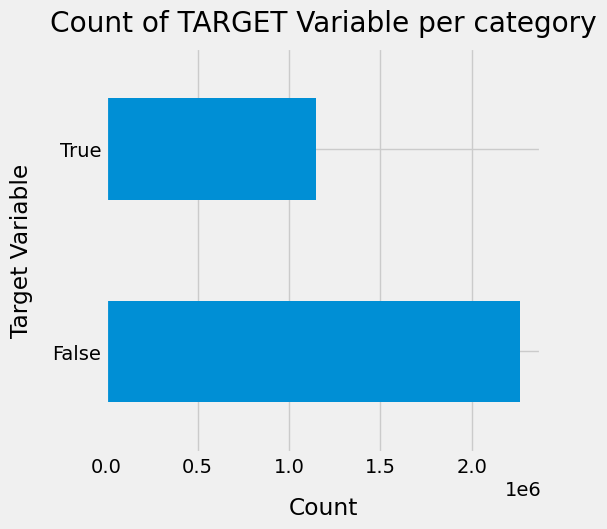

In [46]:
df['Churn'].value_counts().plot(kind='barh', figsize=(5, 5))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [47]:
Retention_Rate = 100*df['Churn'].value_counts()/len(df['Churn'])

In [48]:
print(Retention_Rate)

False    66.415447
True     33.584553
Name: Churn, dtype: float64


**The Retention Rate is 66.415**

Text(0.5, 1.0, 'Churn')

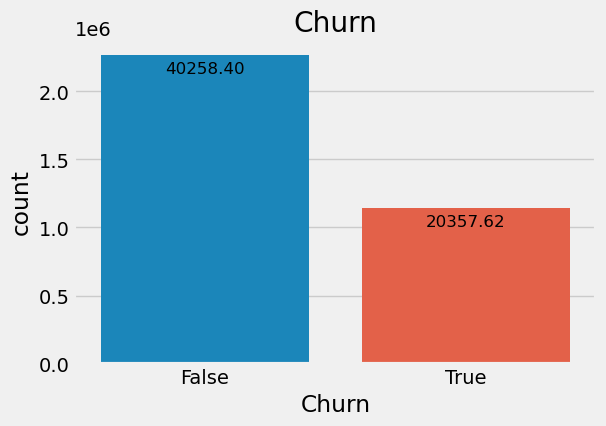

In [49]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.title('Churn')

Text(0.5, 1.0, 'Season')

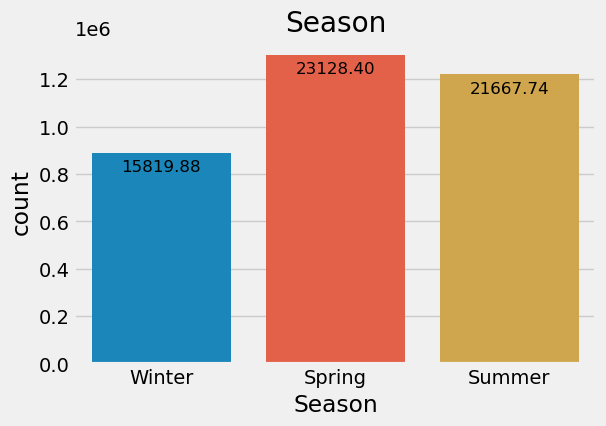

In [50]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Season', data=df)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.title('Season')

Text(0.5, 1.0, 'Type_of_Day')

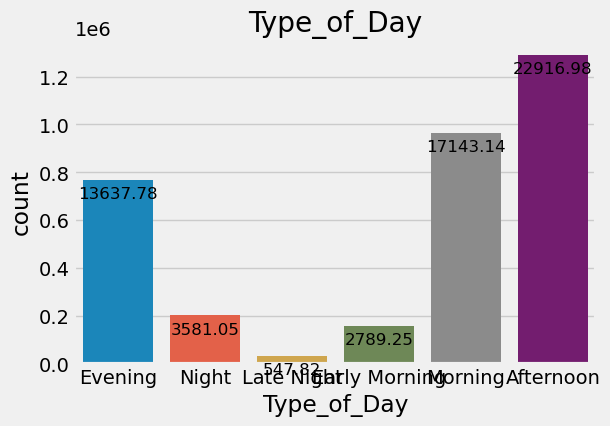

In [51]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Type_of_Day', data=df)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.title('Type_of_Day')

<AxesSubplot:xlabel='Churn_Rate', ylabel='Density'>

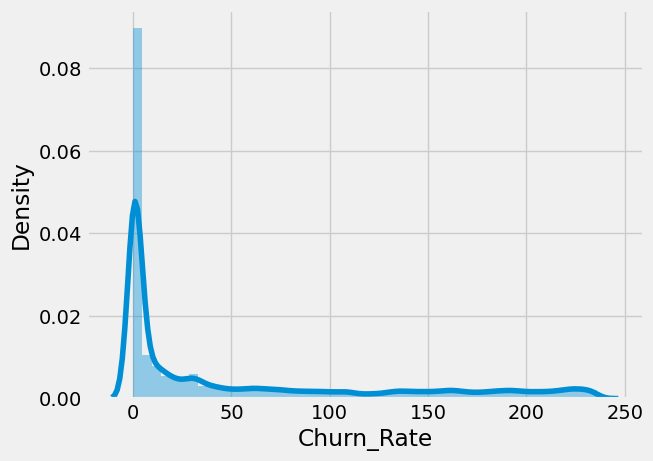

In [52]:
# Churn Rate
sns.distplot(df['Churn_Rate'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3412682 entries, 2018-07-01 to 2019-02-22
Data columns (total 18 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Amount                  float64            
 1   PayeeRefID              int64              
 2   CreatedDate             datetime64[ns, UTC]
 3   TransactionStatusRefID  int64              
 4   AgentRefID              int64              
 5   DistributorRefID        int64              
 6   hour                    int64              
 7   Year                    int64              
 8   Month                   int64              
 9   Day                     int64              
 10  Day_of_Week             int64              
 11  is_quarter_date         int64              
 12  is_weekend              int64              
 13  Type_of_Day             object             
 14  Season                  object             
 15  last_transaction_date   datetime64

In [54]:
df = df.drop(columns= ['CreatedDate','last_transaction_date','DistributorRefID','PayeeRefID','AgentRefID'])

In [55]:
df.dtypes

Amount                    float64
TransactionStatusRefID      int64
hour                        int64
Year                        int64
Month                       int64
Day                         int64
Day_of_Week                 int64
is_quarter_date             int64
is_weekend                  int64
Type_of_Day                object
Season                     object
Churn_Rate                  int64
Churn                        bool
dtype: object

In [56]:
df['Month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

In [57]:
import datetime
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets

import warnings
warnings.filterwarnings('ignore')

In [58]:
df

,Amount,TransactionStatusRefID,hour,Year,Month,Day,Day_of_Week,is_quarter_date,is_weekend,Type_of_Day,Season,Churn_Rate,Churn
date,,,,,,,,,,,,,
2018-07-01,1.0,2,18,2018,7,1,6,3,1,Evening,Winter,236,True
2018-07-01,1.0,6,18,2018,7,1,6,3,1,Evening,Winter,1,False
2018-07-01,1.0,2,18,2018,7,1,6,3,1,Evening,Winter,1,False
2018-07-01,1.0,6,18,2018,7,1,6,3,1,Evening,Winter,1,False
2018-07-01,1.0,2,19,2018,7,1,6,3,1,Evening,Winter,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-22,1700.0,2,23,2019,2,22,4,1,0,Night,Summer,0,False
2019-02-22,700.0,2,23,2019,2,22,4,1,0,Night,Summer,0,False
2019-02-22,10000.0,2,23,2019,2,22,4,1,0,Night,Summer,0,False


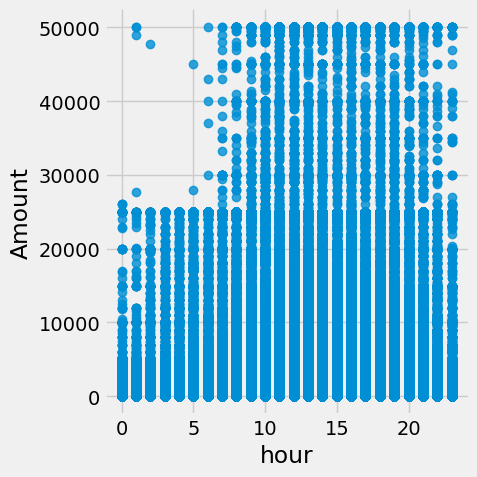

In [59]:
sns.lmplot(data=df, x='hour', y='Amount', fit_reg=False)

<AxesSubplot:xlabel='Month', ylabel='Amount'>

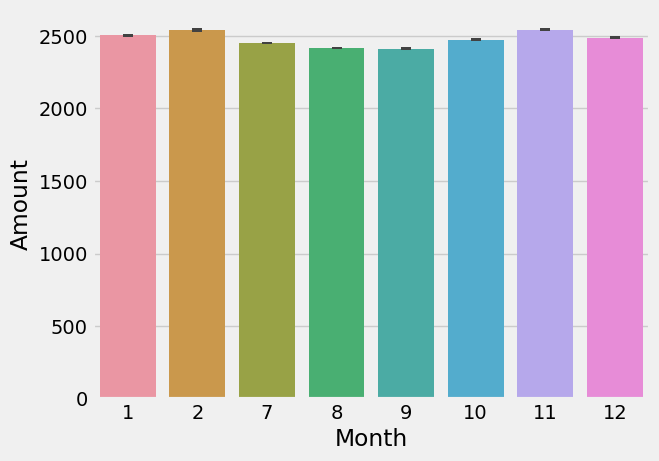

In [60]:
sns.barplot(data=df, x='Month', y='Amount')

<AxesSubplot:xlabel='Season', ylabel='Amount'>

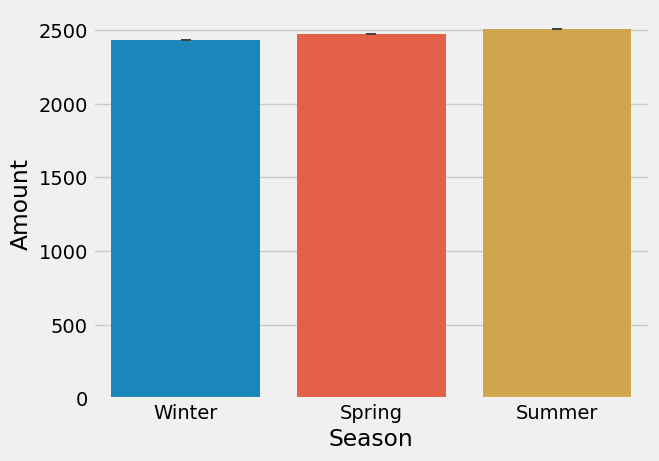

In [61]:
sns.barplot(data=df, x='Season', y='Amount')

<AxesSubplot:>

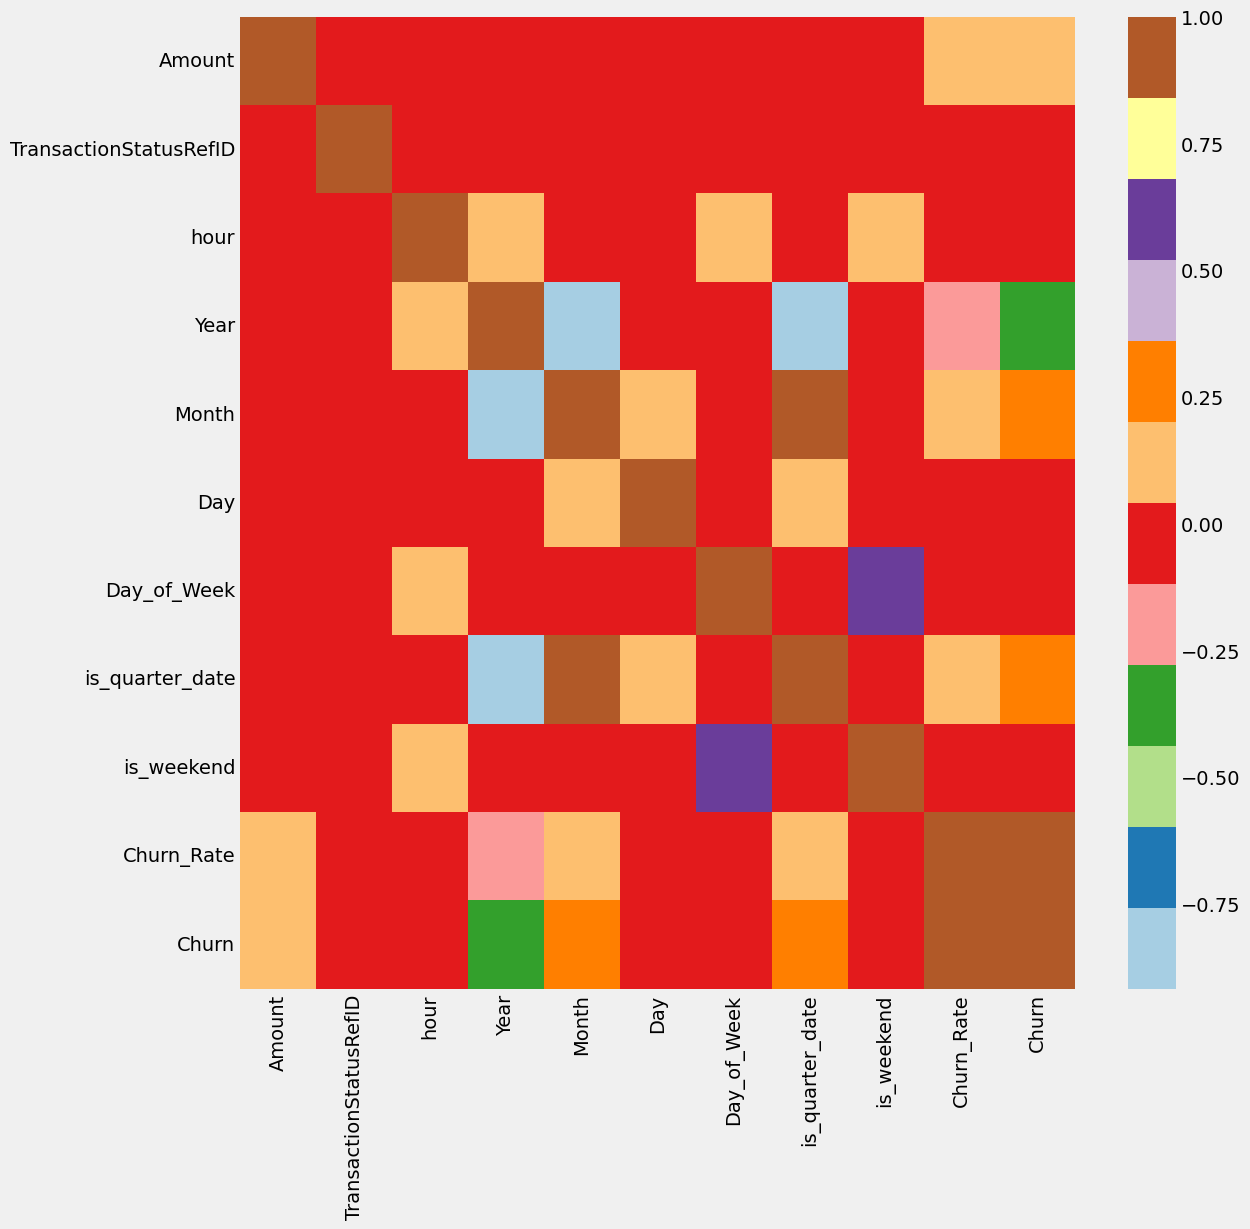

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

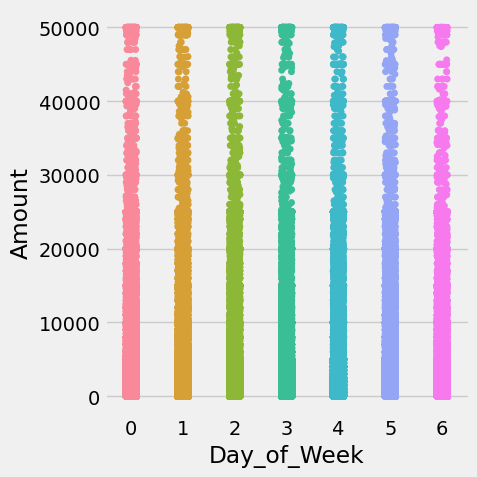

In [63]:
sns.catplot(x = 'Day_of_Week', y = 'Amount', data = df)

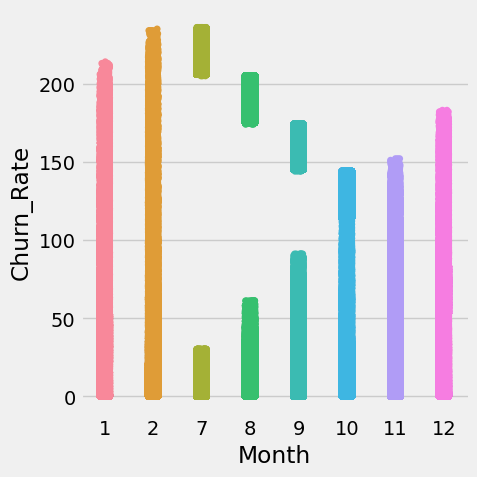

In [64]:
sns.catplot(x = 'Month', y = 'Churn_Rate', data = df)

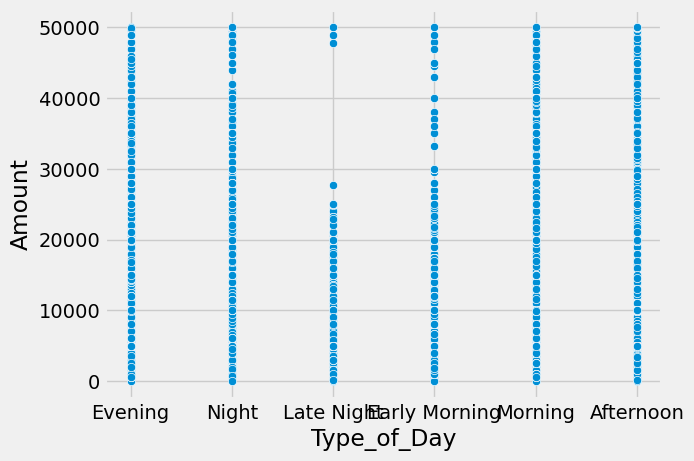

In [65]:
sns.scatterplot(x = df.Type_of_Day, 
                y = df.Amount);

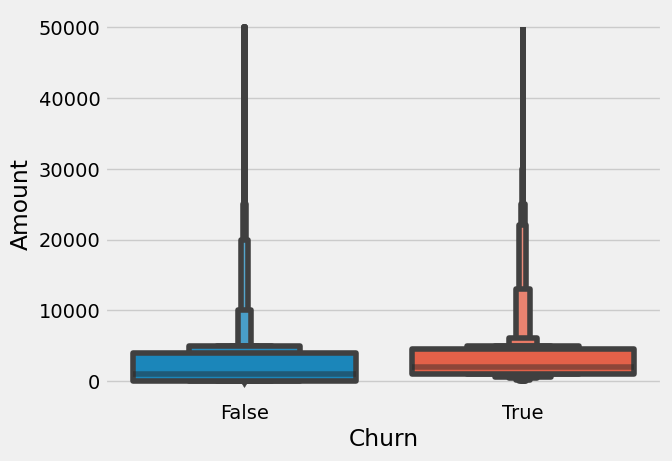

In [66]:
sns.boxenplot(x = df.Churn, 
                y = df.Amount);

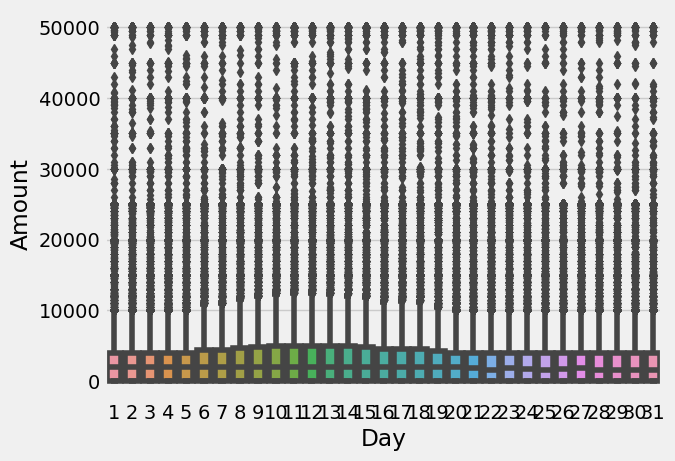

In [67]:
sns.boxplot(x = df.Day, y = df.Amount);

In [68]:
df.dtypes

Amount                    float64
TransactionStatusRefID      int64
hour                        int64
Year                        int64
Month                       int64
Day                         int64
Day_of_Week                 int64
is_quarter_date             int64
is_weekend                  int64
Type_of_Day                object
Season                     object
Churn_Rate                  int64
Churn                        bool
dtype: object

In [69]:
numeric_columns = [col for col in df.columns if df[col].dtype!='object' and col!='Churn']

In [70]:
numeric_columns

['Amount',
 'TransactionStatusRefID',
 'hour',
 'Year',
 'Month',
 'Day',
 'Day_of_Week',
 'is_quarter_date',
 'is_weekend',
 'Churn_Rate']

In [71]:
df['Type_of_Day'].replace({'Afternoon': 0, 'Morning' : 1, 'Night':2, 'Evening':3, 'Early Morning':4, 'Late Night':5}, 
                          inplace=True)
df['Season'].replace({'Spring':0, 'Summer':1, 'Autumn':2, 'Winter':3}, inplace=True)

In [72]:
df

,Amount,TransactionStatusRefID,hour,Year,Month,Day,Day_of_Week,is_quarter_date,is_weekend,Type_of_Day,Season,Churn_Rate,Churn
date,,,,,,,,,,,,,
2018-07-01,1.0,2,18,2018,7,1,6,3,1,3,3,236,True
2018-07-01,1.0,6,18,2018,7,1,6,3,1,3,3,1,False
2018-07-01,1.0,2,18,2018,7,1,6,3,1,3,3,1,False
2018-07-01,1.0,6,18,2018,7,1,6,3,1,3,3,1,False
2018-07-01,1.0,2,19,2018,7,1,6,3,1,3,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-22,1700.0,2,23,2019,2,22,4,1,0,2,1,0,False
2019-02-22,700.0,2,23,2019,2,22,4,1,0,2,1,0,False
2019-02-22,10000.0,2,23,2019,2,22,4,1,0,2,1,0,False


In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [74]:
# Changing it float
df['Season'].unique()

array([3, 0, 1], dtype=int64)

In [75]:
df.round(5)

,Amount,TransactionStatusRefID,hour,Year,Month,Day,Day_of_Week,is_quarter_date,is_weekend,Type_of_Day,Season,Churn_Rate,Churn
date,,,,,,,,,,,,,
2018-07-01,1.0,2,18,2018,7,1,6,3,1,3,3,236,True
2018-07-01,1.0,6,18,2018,7,1,6,3,1,3,3,1,False
2018-07-01,1.0,2,18,2018,7,1,6,3,1,3,3,1,False
2018-07-01,1.0,6,18,2018,7,1,6,3,1,3,3,1,False
2018-07-01,1.0,2,19,2018,7,1,6,3,1,3,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-22,1700.0,2,23,2019,2,22,4,1,0,2,1,0,False
2019-02-22,700.0,2,23,2019,2,22,4,1,0,2,1,0,False
2019-02-22,10000.0,2,23,2019,2,22,4,1,0,2,1,0,False


<AxesSubplot:xlabel='date', ylabel='Churn_Rate'>

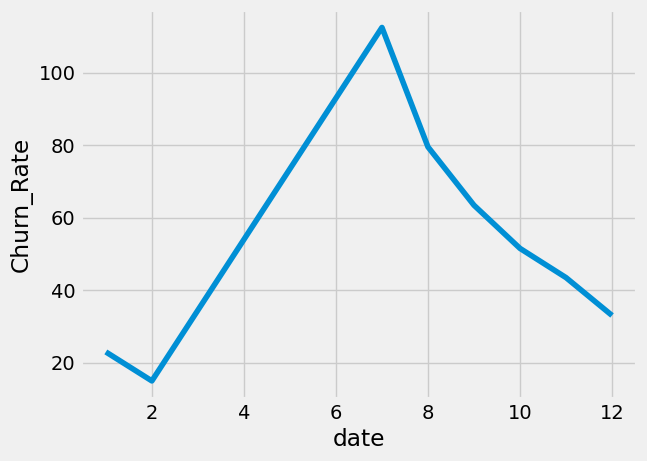

In [76]:
sns.lineplot(data=monthly_avg)

In [77]:
df[332234:332255]

,Amount,TransactionStatusRefID,hour,Year,Month,Day,Day_of_Week,is_quarter_date,is_weekend,Type_of_Day,Season,Churn_Rate,Churn
date,,,,,,,,,,,,,
2018-09-22,1.0,2,8,2018,9,22,5,3,0,1,0,1,False
2018-09-22,1.0,6,8,2018,9,22,5,3,0,1,0,1,False
2018-09-22,1.0,2,9,2018,9,22,5,3,0,1,0,1,False
2018-09-22,1.0,2,9,2018,9,22,5,3,0,1,0,1,False
2018-09-22,1.0,2,9,2018,9,22,5,3,0,1,0,1,False
2018-09-22,1.0,2,9,2018,9,22,5,3,0,1,0,1,False
2018-09-22,1.0,2,9,2018,9,22,5,3,0,1,0,1,False
2018-09-22,1.0,2,9,2018,9,22,5,3,0,1,0,1,False
2018-09-22,1.0,2,9,2018,9,22,5,3,0,1,0,1,False


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [79]:
#split df into X & y
y = df['Churn'].copy()
X = df.drop('Churn', axis=1).copy()

In [80]:
X.round(decimals=5)

,Amount,TransactionStatusRefID,hour,Year,Month,Day,Day_of_Week,is_quarter_date,is_weekend,Type_of_Day,Season,Churn_Rate
date,,,,,,,,,,,,
2018-07-01,1.0,2,18,2018,7,1,6,3,1,3,3,236
2018-07-01,1.0,6,18,2018,7,1,6,3,1,3,3,1
2018-07-01,1.0,2,18,2018,7,1,6,3,1,3,3,1
2018-07-01,1.0,6,18,2018,7,1,6,3,1,3,3,1
2018-07-01,1.0,2,19,2018,7,1,6,3,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-22,1700.0,2,23,2019,2,22,4,1,0,2,1,0
2019-02-22,700.0,2,23,2019,2,22,4,1,0,2,1,0
2019-02-22,10000.0,2,23,2019,2,22,4,1,0,2,1,0


In [81]:
#Min-Max Scaler

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)


In [82]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [83]:
y = df['Churn']

In [84]:
y = y.astype(int)

In [85]:
y

date
2018-07-01    1
2018-07-01    0
2018-07-01    0
2018-07-01    0
2018-07-01    0
             ..
2019-02-22    0
2019-02-22    0
2019-02-22    0
2019-02-22    0
2019-02-22    0
Name: Churn, Length: 3412682, dtype: int32

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=21)

In [88]:
X_test = X_test.round(decimals = 5)
X_train = X_train.round(decimals = 5)
y_test = y_test.round(decimals=5)
y_train = y_train.round(decimals =5)

Logistic Regression Accuracy : 1.00

Logistic Regression Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    679920
           1       1.00      1.00      1.00    343885

    accuracy                           1.00   1023805
   macro avg       1.00      1.00      1.00   1023805
weighted avg       1.00      1.00      1.00   1023805




<AxesSubplot:>

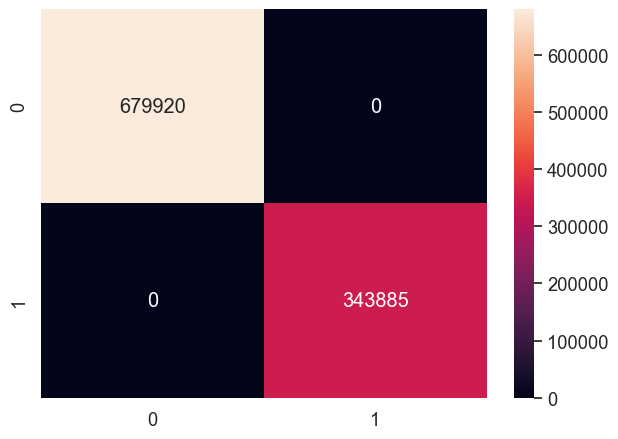

In [89]:
loreg = LogisticRegression(C = 1000, max_iter = 1000)
loreg.fit(X_train, y_train)
lrg_pred = loreg.predict(X_test)

# model accuracy
lr_accuracy = accuracy_score(y_test, lrg_pred)
print(f'Logistic Regression Accuracy : {lr_accuracy:.2f}\n')

# classification Report
lr_clr = classification_report(y_test, lrg_pred)
print(f'Logistic Regression Report :\n {lr_clr}\n')

# logistic regression
lr_cm = confusion_matrix(y_test, lrg_pred)
sns.set(font_scale = 1.2)
sns.heatmap(lr_cm, annot = True,fmt = 'd')
     

Decison Tree Classifier Accuracy : 1.00

Decison Tree Classifier Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    679920
           1       1.00      1.00      1.00    343885

    accuracy                           1.00   1023805
   macro avg       1.00      1.00      1.00   1023805
weighted avg       1.00      1.00      1.00   1023805




<AxesSubplot:>

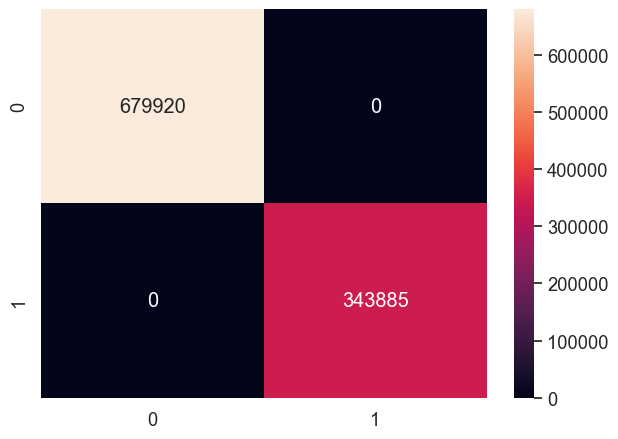

In [90]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

# model accuracy
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print(f'Decison Tree Classifier Accuracy : {dtree_accuracy:.2f}\n')

# classification Report
dtree_clr = classification_report(y_test, dtree_pred)
print(f'Decison Tree Classifier Report :\n {dtree_clr}\n')

# logistic regression
dtree_cm = confusion_matrix(y_test, dtree_pred)
sns.set(font_scale = 1.2)
sns.heatmap(dtree_cm, annot = True,fmt = 'd')

RandomForestClassifier Accuracy : 1.00

RandomForestClassifier Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    679920
           1       1.00      1.00      1.00    343885

    accuracy                           1.00   1023805
   macro avg       1.00      1.00      1.00   1023805
weighted avg       1.00      1.00      1.00   1023805




<AxesSubplot:>

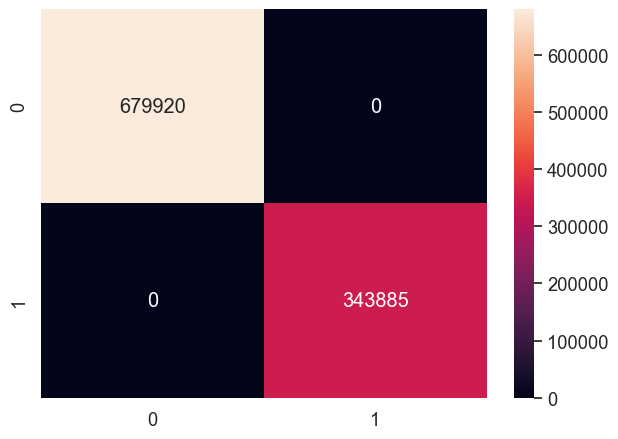

In [91]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# model accuracy
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print(f'RandomForestClassifier Accuracy : {rfc_accuracy:.2f}\n')

# classification Report
rfc_clr = classification_report(y_test, rfc_pred)
print(f'RandomForestClassifier Report :\n {rfc_clr}\n')

# logistic regression
rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.set(font_scale = 1.2)
sns.heatmap(rfc_cm, annot = True,fmt = 'd')

KNeighborsClassifier Accuracy : 1.00

KNeighborsClassifier Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    679920
           1       1.00      1.00      1.00    343885

    accuracy                           1.00   1023805
   macro avg       1.00      1.00      1.00   1023805
weighted avg       1.00      1.00      1.00   1023805




<AxesSubplot:>

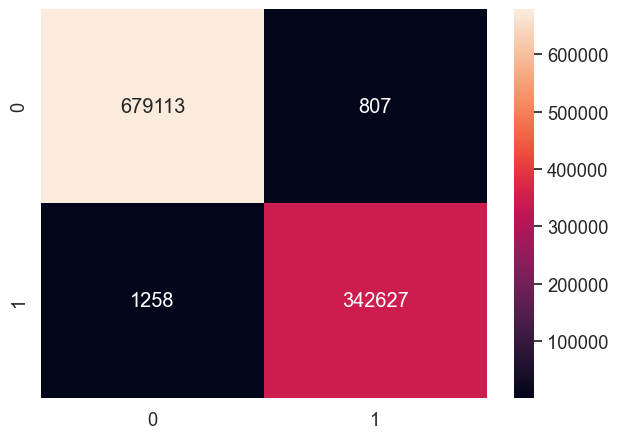

In [92]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

# model accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'KNeighborsClassifier Accuracy : {knn_accuracy:.2f}\n')

# classification Report
knn_clr = classification_report(y_test, knn_pred)
print(f'KNeighborsClassifier Report :\n {knn_clr}\n')

# KNeighborsClassifier
knn_cm = confusion_matrix(y_test, knn_pred)
sns.set(font_scale = 1.2)
sns.heatmap(knn_cm, annot = True,fmt = 'd')

XGBClassifier Accuracy : 1.00

XGBClassifier Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    679920
           1       1.00      1.00      1.00    343885

    accuracy                           1.00   1023805
   macro avg       1.00      1.00      1.00   1023805
weighted avg       1.00      1.00      1.00   1023805




<AxesSubplot:>

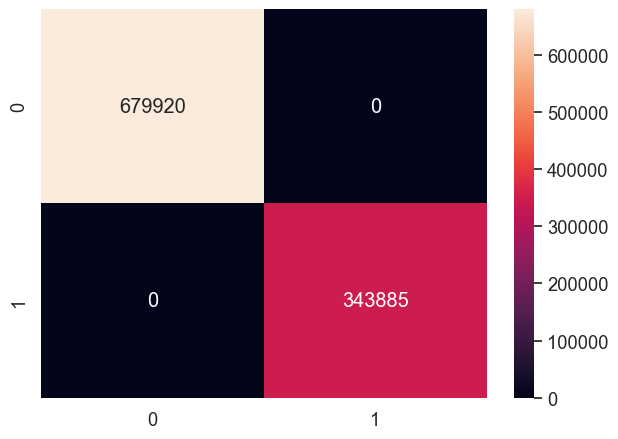

In [93]:
Xgbc = XGBClassifier()
Xgbc.fit(X_train, y_train)
Xgb_pred = Xgbc.predict(X_test)

# model accuracy
Xgb_accuracy = accuracy_score(y_test, Xgb_pred)
print(f'XGBClassifier Accuracy : {Xgb_accuracy:.2f}\n')

# classification Report
Xgb_clr = classification_report(y_test, Xgb_pred)
print(f'XGBClassifier Report :\n {Xgb_clr}\n')

# logistic regression
Xgb_cm = confusion_matrix(y_test, Xgb_pred)
sns.set(font_scale = 1.2)
sns.heatmap(Xgb_cm, annot = True,fmt = 'd')

In [ ]:
C